<a href="https://colab.research.google.com/github/brad0taylor/Graph/blob/master/alu_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import print_function
import keras.backend as K 
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Lambda
from keras.layers import Conv2D, MaxPooling2D
from keras.utils  import to_categorical
from keras import regularizers
from keras.layers import RNN, dot
from keras import optimizers



import os

import numpy as np
import math

import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Using TensorFlow backend.


Found GPU at: /device:GPU:0


In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import  sys
def printf(format, *args):
#    print(format % args )
    sys.stdout.write(format % args)
    
#printf('x0=%f3', x[0,0] )

In [0]:
def bit_count(n):
      assert n >= 0, 'Argument of bit_count() must be non-negative'
      count = 0
      while n:
          n &= n - 1
          count += 1
      return count
  

for i in range(100) :
  ii=int(i)
  bits= bit_count(i)
  print(bin(ii),bits)
  

0b0 0
0b1 1
0b10 1
0b11 2
0b100 1
0b101 2
0b110 2
0b111 3
0b1000 1
0b1001 2
0b1010 2
0b1011 3
0b1100 2
0b1101 3
0b1110 3
0b1111 4
0b10000 1
0b10001 2
0b10010 2
0b10011 3
0b10100 2
0b10101 3
0b10110 3
0b10111 4
0b11000 2
0b11001 3
0b11010 3
0b11011 4
0b11100 3
0b11101 4
0b11110 4
0b11111 5
0b100000 1
0b100001 2
0b100010 2
0b100011 3
0b100100 2
0b100101 3
0b100110 3
0b100111 4
0b101000 2
0b101001 3
0b101010 3
0b101011 4
0b101100 3
0b101101 4
0b101110 4
0b101111 5
0b110000 2
0b110001 3
0b110010 3
0b110011 4
0b110100 3
0b110101 4
0b110110 4
0b110111 5
0b111000 3
0b111001 4
0b111010 4
0b111011 5
0b111100 4
0b111101 5
0b111110 5
0b111111 6
0b1000000 1
0b1000001 2
0b1000010 2
0b1000011 3
0b1000100 2
0b1000101 3
0b1000110 3
0b1000111 4
0b1001000 2
0b1001001 3
0b1001010 3
0b1001011 4
0b1001100 3
0b1001101 4
0b1001110 4
0b1001111 5
0b1010000 2
0b1010001 3
0b1010010 3
0b1010011 4
0b1010100 3
0b1010101 4
0b1010110 4
0b1010111 5
0b1011000 3
0b1011001 4
0b1011010 4
0b1011011 5
0b1011100 4
0b1011101 

(26000, 1, 28) (26000, 1)
opcodes= 26 ['cst0' 'sign' 'sela' 'selb' 'add' 'sub' 'mult' 'div' 'mod' 'max' 'min'
 'abs' 'log' 'exp' 'sin' 'cos' 'tanh' 'xor' 'shft' 'and' 'or' 'popc'
 'inta' 'intb' 'bit0' 'bitx']
[ 999,0] op=cst0 opA=99.80 opB=98.00 out=   +0.00  ---- A= 63cc B= 6200 O=    0 --- a=       0b1100011 b=       0b1100010 o=                             0b0 
[1999,0] op=sign opA=99.80 opB=98.00 out= +100.00  ---- A= 63cc B= 6200 O= 6400 --- a=       0b1100011 b=       0b1100010 o=                       0b1100100 
[2999,0] op=sela opA=99.80 opB=98.00 out=  +99.80  ---- A= 63cc B= 6200 O= 63cc --- a=       0b1100011 b=       0b1100010 o=                       0b1100011 
[3999,0] op=selb opA=99.80 opB=98.00 out=  +98.00  ---- A= 63cc B= 6200 O= 6200 --- a=       0b1100011 b=       0b1100010 o=                       0b1100010 
[4999,0] op= add opA=99.80 opB=98.00 out= +197.80  ---- A= 63cc B= 6200 O= c5cc --- a=       0b1100011 b=       0b1100010 o=                      0b11000101 
[

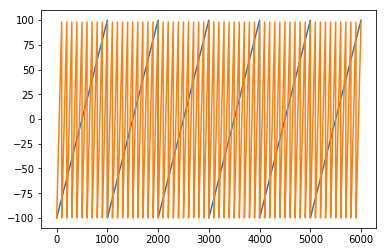

In [92]:
#make the ops
#x=np.vstack((np.random.rand(1000,10),-np.random.rand(1000,10)))
#y=np.vstack((np.ones((1000,1)),np.zeros((1000,1))))

scale = 200
offset = 100

nsamp=26000
x=np.random.random((nsamp,1,28))
y=np.zeros((nsamp,1))



op = np.zeros(nsamp,int)
op  = op.astype(str)
opcodes  = np.zeros(26)
opcodes  = op.astype(str)
opcode=0

# initialize initial data
for i in range(int(nsamp/1000)) :
  for j in range (10) :
    for k in range(100) :
      x[i*1000+j*100+k,0,0]=(j/10+k/1000 )*scale-offset
      x[i*1000+j*100+k,0,1]=(k*1/100     )*scale-offset
  
print(x.shape, y.shape)
plt.plot(x [20000:26000,0,0:2],'-')
#plt.plot(y [0:nsamp], '-')
#plt.plot(yo[0:nsamp], '-')
plt.show()

  


def bit_count(n):
#   assert n >= 0, 'Argument of bit_count() must be non-negative'
    count = 0
    while n:
        n &= n - 1
        count += 1
    return count
  
i=0;

if(1) :
  # cst0
  n=1000 
  x[ i:i+n,:,2:28] =  to_categorical(opcode, 26)
  y[ i:i+n,:     ] = 0
  op[i:i+n]='cst0'
  opcodes[opcode]=op[i]
  i=i+n;  opcode=opcode+1
  
  # sign 
  n=1000
  x[ i:i+n,:,2:28] = to_categorical(opcode, 26)
  y[ i:i+n,:     ] = np.sign(x[i:i+n,:,0]  )*100
  op[i:i+n]='sign'
  opcodes[opcode]=op[i]
  i=i+n;  opcode=opcode+1
  


if(1) :
  # sela
  n=1000
  x[ i:i+n,:,2:28] = to_categorical(opcode, 26)
  y[ i:i+n,:     ] = x[ i:i+n,:,0]
  op[i:i+n]='sela'
  opcodes[opcode]=op[i]
  i=i+n; opcode=opcode+1
  
  #selb 
  n=1000
  x[ i:i+n,:,2:28] = to_categorical(opcode, 26)
  y[ i:i+n,:     ] = x[ i:i+n,:,1]
  op[i:i+n]='selb'
  opcodes[opcode]=op[i]
  i=i+n;  opcode=opcode+1

if(1) :

  # add 
  n=1000 
  x[ i:i+n,:,2:28] = to_categorical(opcode, 26)
  y[ i:i+n,:     ] = x[i:i+n,:,0] + x[i:i+n,:,1] 
  op[i:i+n]='add'
  opcodes[opcode]=op[i]
  i=i+n; opcode=opcode+1
  
if(1)  :
  # sub 
  n=1000
  x[ i:i+n,:,2:28] = to_categorical(opcode, 26)
  y[ i:i+n,:     ] = x[i:i+n,:,0] - x[i:i+n,:,1] 
  op[i:i+n]='sub'
  opcodes[opcode]=op[i]
  i=i+n;  opcode=opcode+1

if(1) :
  # mult 
  n=1000
  x[ i:i+n,:,2:28] = to_categorical(opcode, 26)
  y[ i:i+n,:     ] = x[i:i+n,:,0] * x[i:i+n,:,1] / 100
  op[i:i+n]='mult'
  opcodes[opcode]=op[i]
  i=i+n; opcode=opcode+1

if(1) :  
  # div 
  n=1000 
  x[ i:i+n,:,2:28] = to_categorical(opcode, 26)
  for j in range(n):
    if x[i+j,:,1]!=0 :
      y[ i+j,0     ] = x[i+j,0,0] / x[i+j,0,1]
    else :
      y[ i+j,0     ] = 0
  op[i:i+n]='div'
  opcodes[opcode]=op[i]
  i=i+n;  opcode=opcode+1
  
  # mod 
  n=1000 
  x[ i:i+n,:,2:28] = to_categorical(opcode, 26)
  for j in range(n):
    if x[i+j,:,1]!=0 :
      y[ i+j,0     ] = x[i+j,0,0] % x[i+j,0,1]
    else :
      y[ i+j,0     ] = 0
  op[i:i+n]='mod'
  opcodes[opcode]=op[i]
  i=i+n;  opcode=opcode+1

if (1) :
  # max 
  n=1000
  x[ i:i+n,:,2:28] = to_categorical(opcode, 26)
  y[ i:i+n,:     ] = np.maximum( x[i:i+n,:,0] ,  x[i:i+n,:,1] )
  op[i:i+n]='max'
  opcodes[opcode]=op[i]
  i=i+n; opcode=opcode+1
  
  # min 
  n=1000
  x[ i:i+n,:,2:28] = to_categorical(opcode, 26)
  y[ i:i+n,:     ] = np.minimum(x[i:i+n,:,0] ,  x[i:i+n,:,1] )
  op[i:i+n]='min'
  opcodes[opcode]=op[i]
  i=i+n; opcode=opcode+1
  
  
  # abs 
  n=1000
  x[ i:i+n,:,2:28] = to_categorical(opcode, 26)
  y[ i:i+n,:     ] = np.abs(x[i:i+n,:,0]  )
  op[i:i+n]='abs'
  opcodes[opcode]=op[i]
  i=i+n;  opcode=opcode+1

if(1):
  # log 
  n=1000
  x[ i:i+n,:,2:28] = to_categorical(opcode, 26)
  for j in range(n):
    if x[i+j,0,0]>0 :
      y[ i+j,0     ] = min(200,np.log(x[i+j,0,0] )*50)
    else :
      y[ i+j,0     ] = 0
  

  op[i:i+n]='log'
  opcodes[opcode]=op[i]
  i=i+n;  opcode=opcode+1

  # e^x 
  n=1000
  x[ i:i+n,:,2:28] = to_categorical(opcode, 26)
  for j in range(n):
    y[ i+j,0     ]= min(200,np.exp(x[i+j,0,0]/100 )*50 )
  op[i:i+n]='exp'
  opcodes[opcode]=op[i]
  i=i+n;  opcode=opcode+1
  
  # sin 
  n=1000
  x[ i:i+n,:,2:28] = to_categorical(opcode, 26)
  y[ i:i+n,:     ] = np.sin(x[i:i+n,:,0]/scale*3.14*4 )*100
  op[i:i+n]='sin'
  opcodes[opcode]=op[i]
  i=i+n;  opcode=opcode+1
  
  # cos 
  n=1000
  x[ i:i+n,:,2:28] = to_categorical(opcode, 26)
  y[ i:i+n,:     ] = np.cos(x[i:i+n,:,0]/scale*3.14*4 )*100
  op[i:i+n]='cos'
  opcodes[opcode]=op[i]
  i=i+n;  opcode=opcode+1
  
  # tanh 
  n=1000
  x[ i:i+n,:,2:28] = to_categorical(opcode, 26)
  y[ i:i+n,:     ] = np.tanh(x[i:i+n,:,0]/scale*3.14*4)*100
  op[i:i+n]='tanh'
  opcodes[opcode]=op[i]
  i=i+n;  opcode=opcode+1

if(1) :
   # xor
  n=1000
  x[ i:i+n,:,2:28] = to_categorical(opcode, 26)
  for j in range(n):
    y[ i+j,0     ] = (np.int(x[i+j,:,0]) ^ np.int(x[i+j,:,1])  )
  op[i:i+n]='xor'
  opcodes[opcode]=op[i]
  i=i+n;  opcode=opcode+1

  # shift 
  n=1000 
  x[ i:i+n,:,2:28] = to_categorical(opcode, 26)
  for j in range(n):
    y[ i+j,0     ] = (np.int(x[i+j,:,0]) << max(0,min(4,np.int(x[i+j,:,1]/25) )) )
  op[i:i+n]='shft'
  opcodes[opcode]=op[i]
  i=i+n;  opcode=opcode+1

  # and
  n=1000
  x[ i:i+n,:,2:28] = to_categorical(opcode, 26)
  for j in range(n):
    y[ i+j,0     ] = (np.int(x[i+j,:,0]) & np.int(x[i+j,:,1])  )
  op[i:i+n]='and'
  opcodes[opcode]=op[i]
  i=i+n;  opcode=opcode+1
  
  
  # or
  n=1000
  x[ i:i+n,:,2:28] =to_categorical(opcode, 26)
  for j in range(n):
    y[ i+j,0     ] = (np.int(x[i+j,:,0]) | np.int(x[i+j,:,1])  )
  op[i:i+n]='or'
  opcodes[opcode]=op[i]
  i=i+n;  opcode=opcode+1
  
  
   
  
  
  # bitcount
  
  n=1000
  x[ i:i+n,:,2:28] = to_categorical(opcode, 26)
  for j in range(n):
    y[ i+j,0     ] = bit_count(max(0,np.int(x[i+j,:,0]))) * 8
  op[i:i+n]='popc'
  opcodes[opcode]=op[i]
  i=i+n;  opcode=opcode+1

  # inta 
  n=1000
  x[ i:i+n,:,2:28] = to_categorical(opcode, 26)
  for j in range(n):
    y[ i+j,0     ] = (np.int(x[i+j,:,0])) 
  op[i:i+n]='inta'
  opcodes[opcode]=op[i]
  i=i+n;  opcode=opcode+1

  # intb 
  n=1000
  x[ i:i+n,:,2:28] = to_categorical(opcode, 26)
  for j in range(n):
    y[ i+j,0     ] = (np.int(x[i+j,:,1])) 
  op[i:i+n]='intb'
  opcodes[opcode]=op[i]
  i=i+n;  opcode=opcode+1

  
  # bit 0
  n=1000
  x[ i:i+n,:,2:28] = to_categorical(opcode, 26)
  for j in range(n):
    
    y[ i+j,0     ] = ((np.int(x[i+j,:,0])) & 1)*100
  op[i:i+n]='bit0'
  opcodes[opcode]=op[i]
  i=i+n;  opcode=opcode+1

   # bit extract
  n=1000
  x[ i:i+n,:,2:28] = to_categorical(opcode, 26)
  for j in range(n):
    
    y[ i+j,0     ] = ((np.int(x[i+j,:,0]))>>max(0,min(16,np.int(x[i+j,:,1]/25))) & 1)*100
  op[i:i+n]='bitx'
  opcodes[opcode]=op[i]
  i=i+n;  opcode=opcode+1


print("opcodes=", opcode, opcodes[0:opcode])

xcat0= to_categorical(x[:,0,0],100)
xcat1= to_categorical(x[:,0,1],100)

xcat0= np.zeros((nsamp,100))
xcat1= np.zeros((nsamp,100))



for ii  in range (0,nsamp,int(nsamp/26)) :
  for t in range (1) :   
    i=ii+999 
    printf('[%4d,%d] op=%4s opA=%2.2f opB=%2.2f out=%+8.2f  ---- A=%5x B=%5x O=%5x --- a=%16s b=%16s o=%32s \n', i, t, op[i], x[i,t,0], x[i,t,1], y[i], int(x[i,t,0]*256), int(x[i,t,1]*256), int(y[i]*256) , bin(int(x[i,t,0])), bin(int(x[i,t,1])), bin(int(y[i])))
 


In [0]:
from keras.callbacks import LearningRateScheduler

# learning rate schedule
def step_decay(epoch):
  initial_lrate = 0.001
  drop = 0.5
  epochs_drop = 10.0
  lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
  #if epoch < 100: lrate= .001
  #if epoch < 30: lrate= .001
  #if epoch < 20: lrate= .01
  #if epoch < 10: lrate= .001
    
  if((epoch%10)==0): print ( 'Epoch:',epoch,'Learning Rate=',  lrate)
  return lrate

In [0]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras import layers
from keras.datasets import mnist
from keras import backend as K


class sinlayer(layers.Layer):


    def compute_output_shape(self, input_shape):
        shape = list(input_shape)
        assert len(shape) == 2  # only valid for 2D tensors
        shape[-1] *= 3
        return tuple(shape)

    def call(self, inputs):
        #inputs -= K.mean(inputs, axis=1, keepdims=True)
        #inputs = K.l2_normalize(inputs, axis=1)
        pos = inputs
        sin = K.sin(inputs)
        cos = K.cos(inputs)
        return K.concatenate([pos, sin, cos], axis=1)

# global parameters
batch_size = 128
num_classes = 10
epochs = 40

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# build the model
model = Sequential()
model.add(layers.Dense(256, input_shape=(784,)))
model.add(sinlayer())
model.add(layers.Dropout(0.1))
model.add(layers.Dense(256))
model.add(sinlayer())
model.add(layers.Dropout(0.1))
model.add(layers.Dense(num_classes))
model.add(layers.Activation('softmax'))

# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# train the model
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

# next, compare with an equivalent network
# with2x bigger Dense layers and ReLU

11493376/11490434 [==============================] - 1s 0us/step


W0616 16:18:09.489314 140515980121984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0616 16:18:09.492182 140515980121984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0616 16:18:09.503229 140515980121984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0616 16:18:09.521770 140515980121984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0616 16:18:09.529928 

60000 train samples
10000 test samples


W0616 16:18:09.706083 140515980121984 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/40


KeyboardInterrupt: ignored

In [0]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras import layers
from keras.datasets import mnist
from keras import backend as K
from keras.layers import Concatenate


class clip10layer(layers.Layer):

  def compute_output_shape(self, input_shape):
    shape = list(input_shape)
    assert len(shape) == 2  # only valid for 2D tensors
    shape[-1] *= 11
    return tuple(shape)
  
  def call(self, inputs):
  #        inputs -= K.mean(inputs, axis=1, keepdims=True)
  #        inputs = K.l2_normalize(inputs, axis=1)
    print('inputs', inputs)
    pos = K.relu(inputs)
    clip0 = K.clip(inputs, 0,10)
    clip1 = K.clip(inputs, 10,20)
    clip2 = K.clip(inputs, 20,30)
    clip3 = K.clip(inputs, 30,40)
    clip4 = K.clip(inputs, 40,50)
    clip5 = K.clip(inputs, 50,60)
    clip6 = K.clip(inputs, 60,70)
    clip7 = K.clip(inputs, 70,80)
    clip8 = K.clip(inputs, 80,90)
    clip9 = K.clip(inputs, 90,100)
    
    return K.concatenate([pos, clip0,clip1,clip2,clip3,clip4,clip5,clip6,clip7,clip8,clip9 ], axis=1)

# global parameters
batch_size = 128
num_classes = 10
epochs = 40

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# build the model


clipmodel=Sequential()
#alumodel.add(Dense(units=64, input_shape=(10,),activation='relu'))


xi    = keras.layers.Input(shape=(784,))
x0    = keras.layers.Dense(  1, activation='relu')(xi)
x1    = keras.layers.Dense(128, activation='relu')(xi)
xclip = clip10layer()(x0)
x2    = keras.layers.Concatenate()([x1, xclip])
x3    = keras.layers.Dense(128, activation='relu')(x2)

#clipmodel.add(layers.Dense(num_classes))
#clipmodel.add(layers.Activation('softmax'))

xout = keras.layers.Dense(num_classes, activation='softmax')(x3)

clipmodel = keras.models.Model(inputs=[xi], outputs=xout )


#
#model = Sequential()
#model.add(layers.Dense(256, input_shape=(784,)))
#model.add(layers.Dense(1))
#model.add(clip10layer())
#model.add(layers.Dropout(0.1))
#model.add(layers.Dense(256))
#model.add(layers.Dense(num_classes))
#model.add(layers.Activation('softmax'))


# compile the model
clipmodel.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

clipmodel.summary()
keras.utils.plot_model(clipmodel, to_file='model.png', show_shapes=False, show_layer_names=True, rankdir='TB')

# train the model
clipmodel.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test))


# next, compare with an equivalent network
# with2x bigger Dense layers and ReLU



60000 train samples
10000 test samples
inputs Tensor("dense_4/Relu:0", shape=(?, 1), dtype=float32)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 1)            785         input_1[0][0]                    
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 128)          100480      input_1[0][0]                    
__________________________________________________________________________________________________
clip10layer_1 (clip10layer)     (None, 11)           0           dense_4[0][0]                    
_________

KeyboardInterrupt: ignored

In [0]:

opt = keras.optimizers.adam(lr=0.01, decay=1e-6)




alumodel=Sequential()
#alumodel.add(Dense(units=64, input_shape=(10,),activation='relu'))


xi0 = keras.layers.Input(shape=(228,))
x0 = keras.layers.Dense(128, activation='relu')(xi0)
x00 = keras.layers.Dense(128, activation='relu')(x0)
x01 = keras.layers.Dense(128, activation='linear')(x00)

xi1 = keras.layers.Input(shape=(228,))
x1  = keras.layers.Dense(128, activation='relu')(xi1)
x10 = keras.layers.Dense(128, activation='relu')(x1)
x11 = keras.layers.Dense(1  , activation='relu')(x1)
xsin  = sinlayer()(x10)
xclip = clip10layer()(x11)
x12    = keras.layers.Concatenate()([x1, xsin, xclip])






x10 = keras.layers.Dense(128, activation='linear')(x12)

#xmult = keras.layers.multiply([x00, x10])
xmult = keras.layers.multiply([x00, x10])
#xm0   = keras.layers.add([x00, x10])

xm0  = keras.layers.Dense(128, activation='relu')(xmult)
xm1  = keras.layers.Dense(128, activation='relu')(xm0)
xadd = keras.layers.add([xm1, x0])
xout = keras.layers.Dense(1, activation='linear')(xadd)

alumodel = keras.models.Model(inputs=[xi0, xi1], outputs=xout )
alumodel.compile(loss='mean_absolute_error',optimizer=opt,metrics=['mean_absolute_error'])
alumodel.summary()

keras.utils.plot_model(alumodel, to_file='model.png', show_shapes=False, show_layer_names=True, rankdir='TB')

inputs Tensor("dense_13/Relu:0", shape=(?, 1), dtype=float32)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 228)          0                                            
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 128)          29312       input_3[0][0]                    
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 128)          16512       dense_11[0][0]                   
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 1)            129         dense_11[0][0]                   
_______________________________________________

In [0]:
#reset history, create results buffer for up to 1000 eons
eons=0;
maxeons=1000;
yhist=np.zeros((maxeons,nsamp))
print(yhist.shape)

(1000, 26000)


In [0]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import



from matplotlib import pylab
from google.colab import widgets
grid = widgets.Grid(4, 1)

lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]


xx=np.reshape(x,(nsamp,28))
yy=np.reshape(y,(nsamp))
xx0=np.zeros((26000,228))

print(x.shape, y.shape)
print(xx.shape, yy.shape)
print(xx0.shape, xx.shape, xcat0.shape,xcat1.shape)

yp=yy
xp=xx0


xx0=np.concatenate([xx,xcat0,xcat1],axis=1)  

pindex=np.random.permutation(26000)
print('yp=',yp.shape,'xp=',xp.shape, 'pindex',pindex.shape)

yp=yy[pindex]
xp=xx0[pindex,:]



with grid.output_to(2, 0):
 
#x0=np.random.random((nsamp,10))
#y0=np.sum(xx,axis=1)
#y0=(x[:,0,0])

  print("eons=",eons)

  
  
  
for eon in range(40) :
  
  yp=yy[pindex]
  xp=xx0[pindex,:]


  with grid.output_to(3, 0):
    print('eon=',eon)
#    hist=alumodel.fit([xx0,xx0], yy, validation_split=0.0, epochs=50, batch_size=32, callbacks=[lrate], verbose=1, shuffle=True)
    hist=alumodel.fit([xp,xp], yp, validation_split=0.0, epochs=50, batch_size=32, callbacks=[lrate], verbose=1, shuffle=True)
 
  eons=eons+1;
  
  yo = alumodel.predict( [xx0,xx0], verbose=1)
  yhist[eons,:]=yo[:,0]

  with grid.output_to(0, 0):
    print('op=',opcodes[0], 'eons=',str(eons))
    plt.plot(x [0:1000,0],'-')
    plt.plot(y [0:1000], '--')
    plt.plot(yo[0:1000], '--')
    plt.show()
  
  
  
  #print(xx[0:10,:])
  
  #print(y[0:nsamp:int(nsamp/20),0], yy[0:nsamp:int(nsamp/20)])
  #print(y[500:510,0], yy[500:510])
  #print(xo[0:nsamp:int(nsamp/20),0]], xo[0:nsamp:int(nsamp/20)])
   
  with grid.output_to(3, 0):
    grid.clear_cell()
    printf('\n   o:')
    for i in range(999,nsamp,int(nsamp/26)) :
      printf(' %5s,', op[i] )
    
    printf('\n   a:')
    for i in range(999,nsamp,int(nsamp/26)) :
      printf(' %5.2f,', xx[i,0])
    
    printf('\n   b:')
    for i in range(999,nsamp,int(nsamp/26)) :
      printf(' %5.2f,', xx[i,1])
    
    print()
    printf('\n   y:')
    for i in range(999,nsamp,int(nsamp/26)) :
      printf(' %5.2f,', y[i])
    
    printf('\n  yo:')
    for i in range(999,nsamp,int(nsamp/26)) :
      printf(' %5.2f,', yo[i])
    
    printf('\n err:')
    for i in range(999,nsamp,int(nsamp/26)) :
      printf(' %5.2f,', yo[i]- y[i])
    
    printf('\nperr:')
    for i in range(999,nsamp,int(nsamp/26)) :
      printf(' %5.2f,', (yo[i]- y[i]) / max(.001,y[i]))
      
    print('\n')
    
    print(hist.history.keys())
    print(hist.history['mean_absolute_error'])
  #print(hist.history['lr']*2)

  with grid.output_to(1, 0):
    print('eons=',eons)

    # summarize history for accuracy
    plt.plot(hist.history['mean_absolute_error'])
    #plt.plot(hist.history['mean_squared_error'])
    #plt.plot(hist.history['val_mean_squared_error'])
    plt.plot(hist.history['lr'])
    plt.title('model accuracy eons='+ str(eons))
    plt.ylabel('mean_absolute_error')
    plt.xlabel('epoch')
    plt.legend(['mse', 'lr'], loc='upper left')
    plt.show()

    

   

(26000, 1, 28) (26000, 1)
(26000, 28) (26000,)
(26000, 228) (26000, 28) (26000, 100) (26000, 100)
yp= (26000,) xp= (26000, 228) pindex (26000,)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

eons= 90


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

eon= 0
Epoch 1/50
Epoch: 0 Learning Rate= 0.001
26000/26000 [==============================] - 5s 196us/step - loss: 8.0295 - mean_absolute_error: 8.0295
Epoch 2/50
26000/26000 [==============================] - 5s 197us/step - loss: 7.1930 - mean_absolute_error: 7.1930
Epoch 3/50
26000/26000 [==============================] - 5s 197us/step - loss: 6.9188 - mean_absolute_error: 6.9188
Epoch 4/50
26000/26000 [==============================] - 5s 198us/step - loss: 6.7335 - mean_absolute_error: 6.7335
Epoch 5/50
26000/26000 [==============================] - 5s 199us/step - loss: 6.6256 - mean_absolute_error: 6.6256
Epoch 6/50
26000/26000 [==============================] - 5s 200us/step - loss: 6.4776 - mean_absolute_error: 6.4776
Epoch 7/50
  320/26000 [..............................] - ETA: 5s - loss: 6.7129 - mean_absolute_error: 6.7129

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

26000/26000 [==============================] - 1s 42us/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


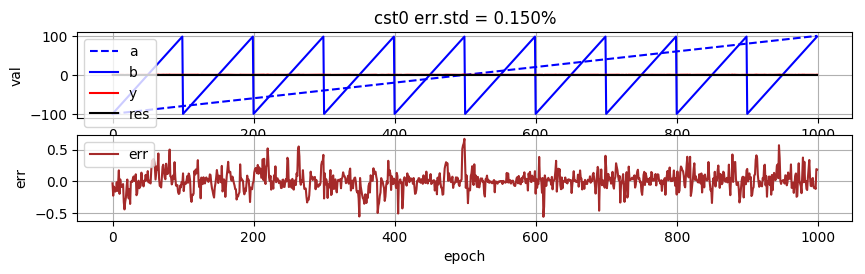

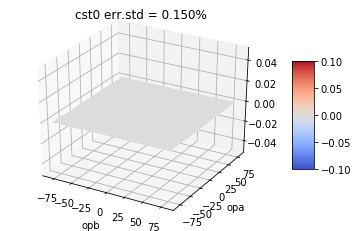

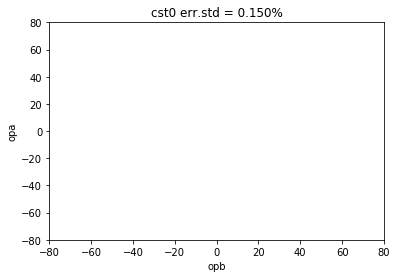

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

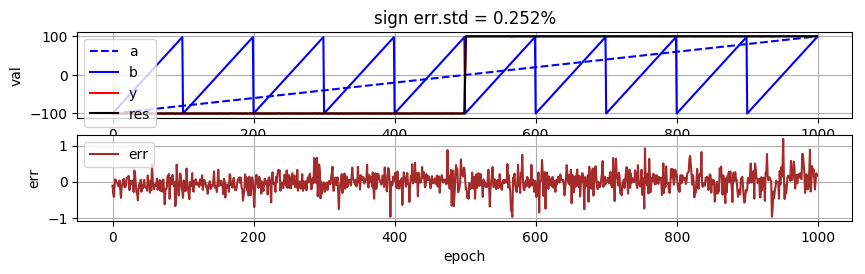

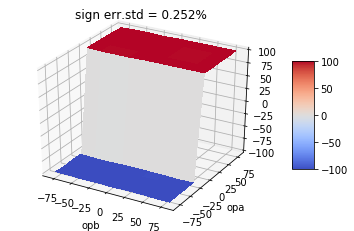

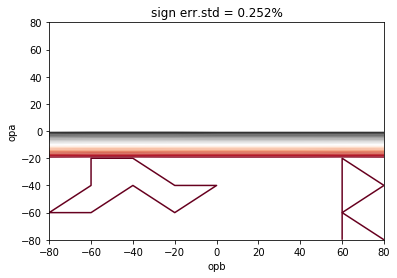

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

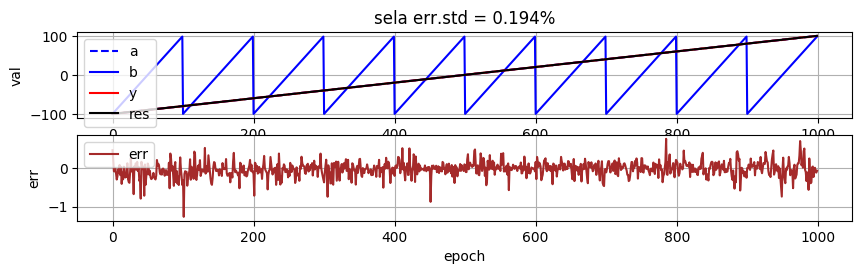

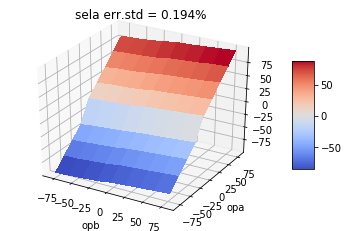

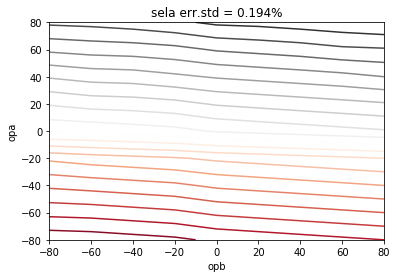

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

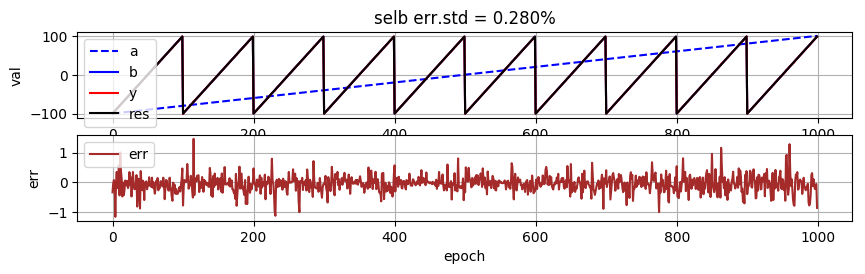

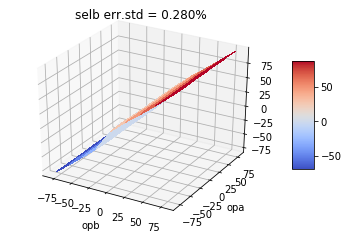

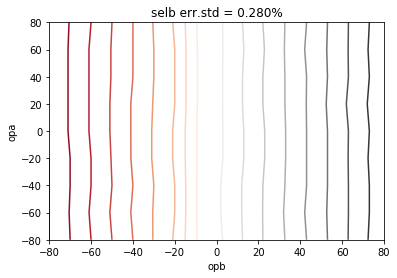

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

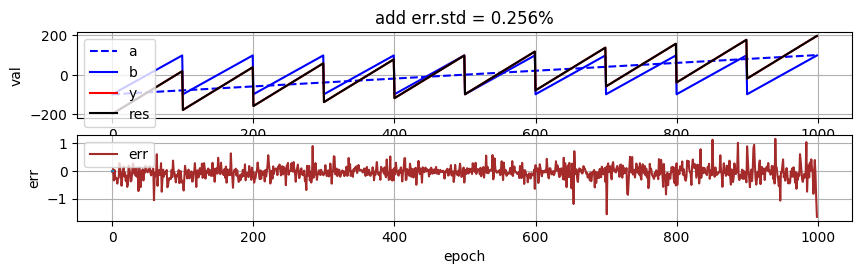

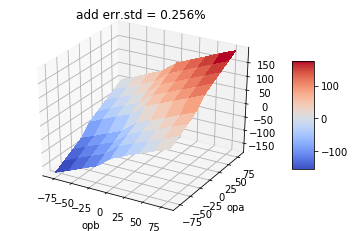

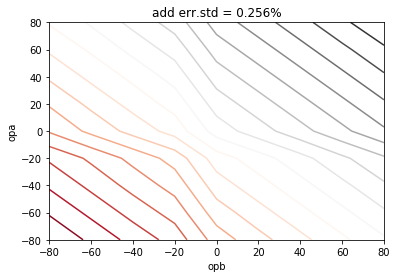

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

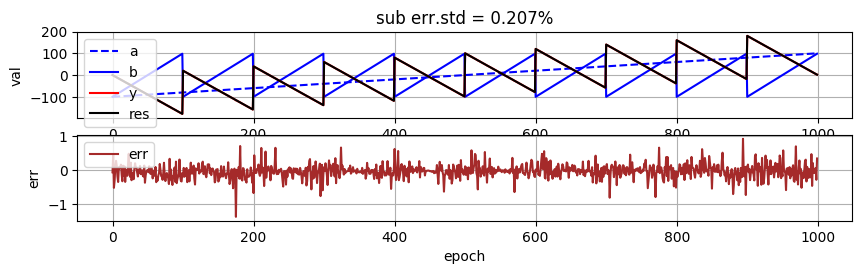

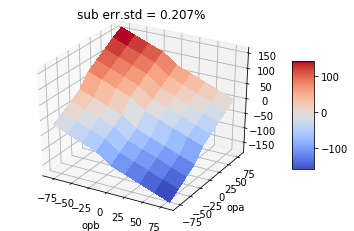

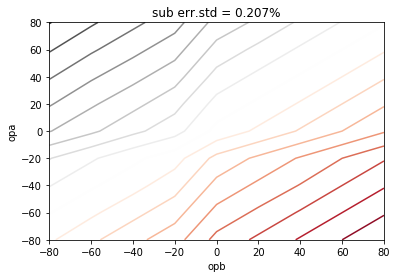

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

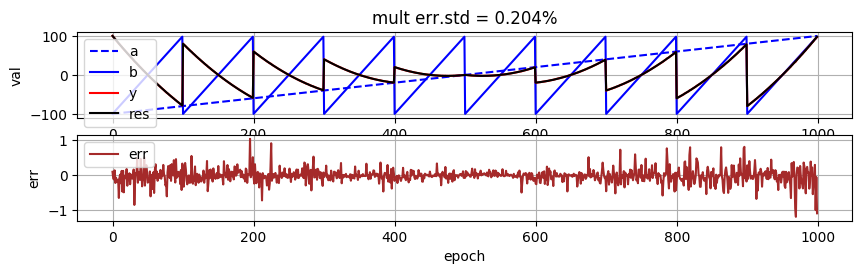

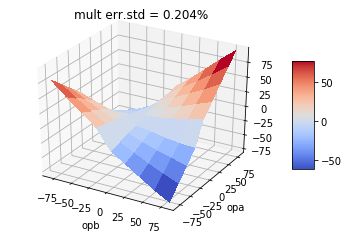

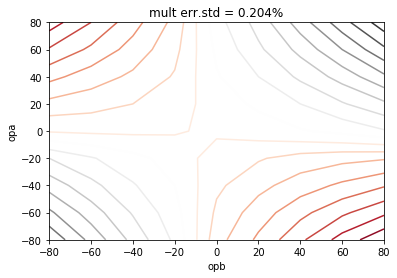

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

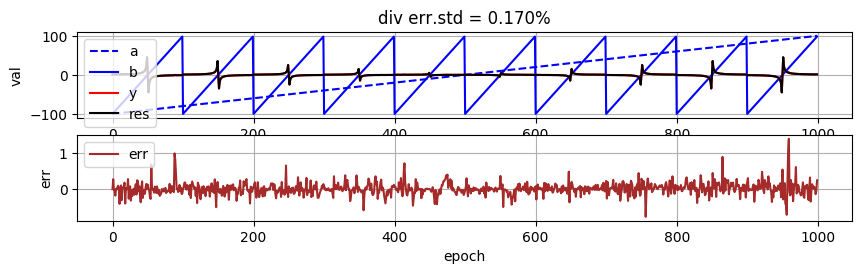

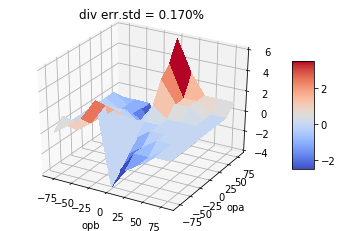

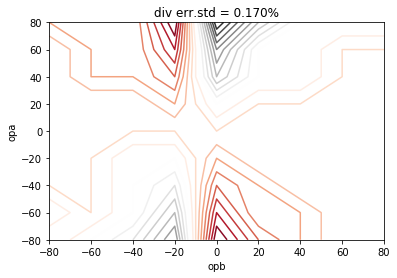

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

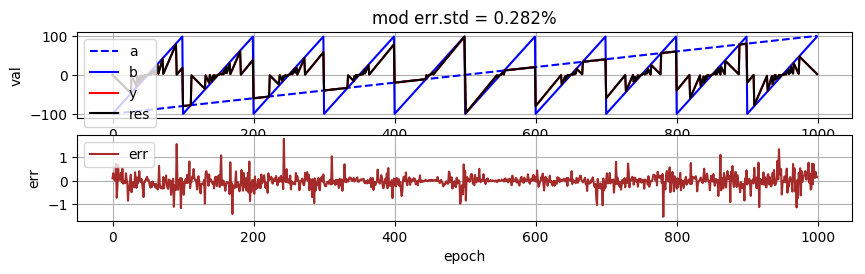

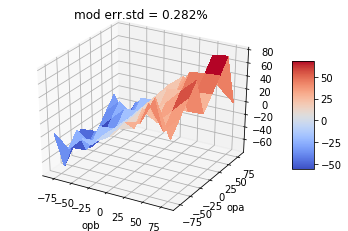

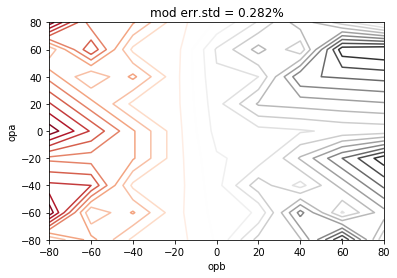

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

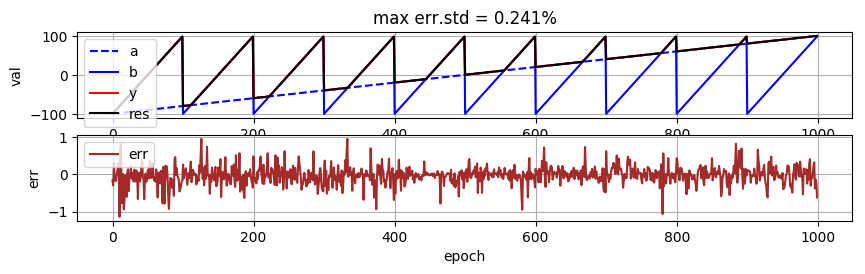

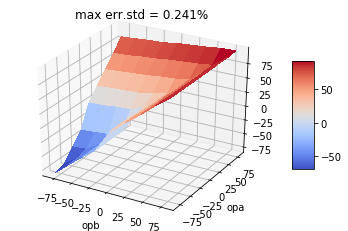

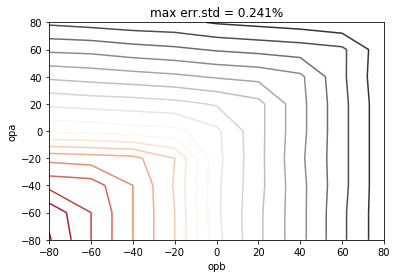

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

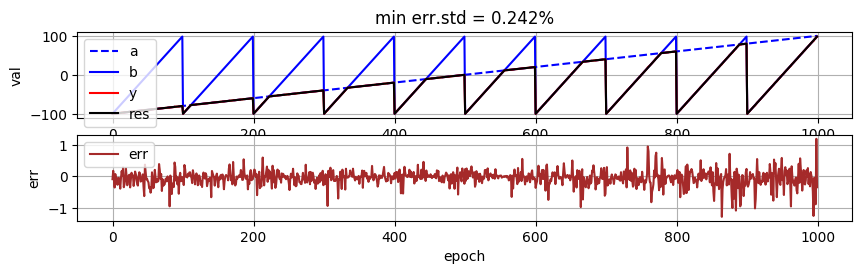

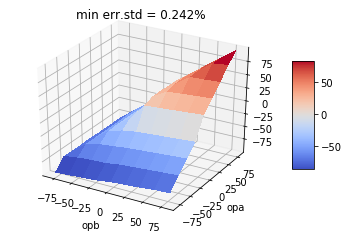

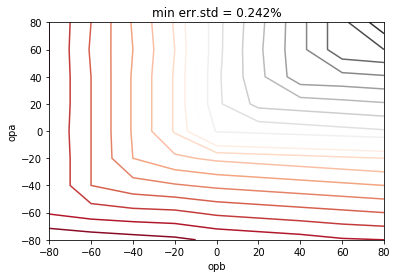

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

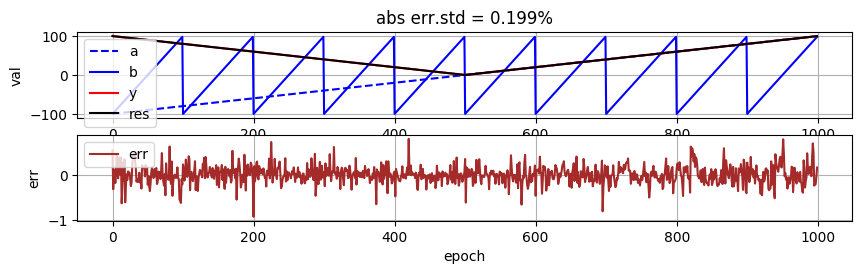

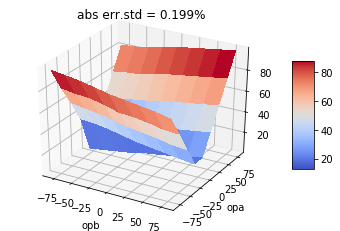

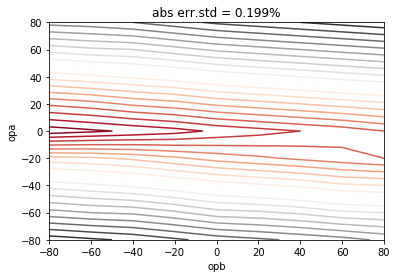

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

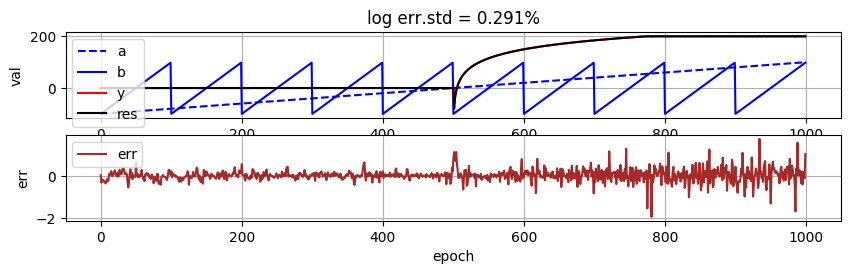

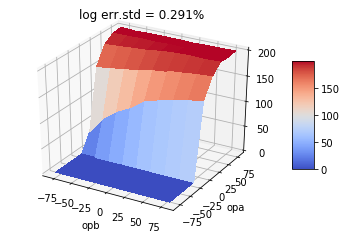

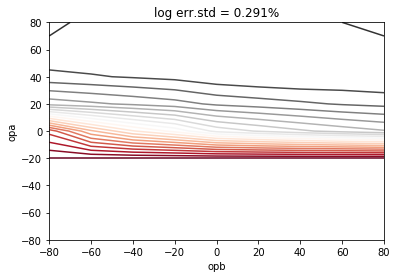

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

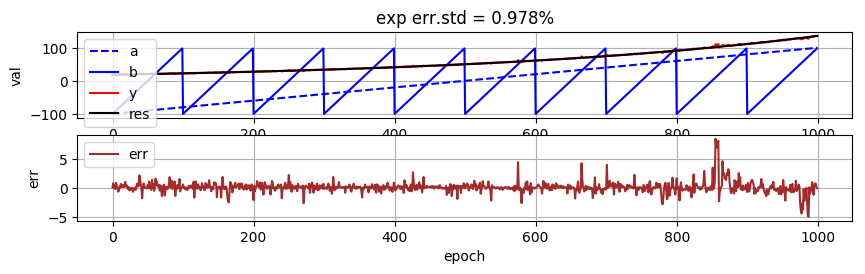

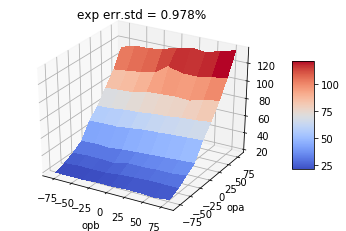

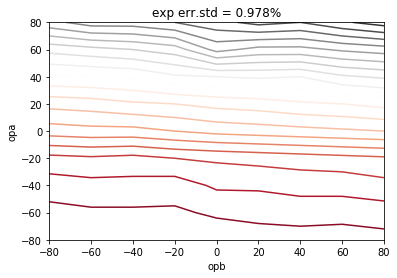

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

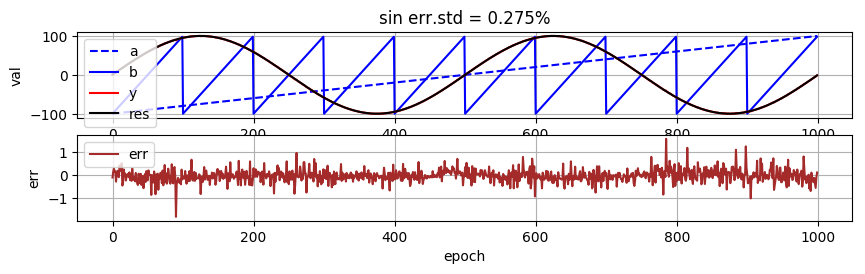

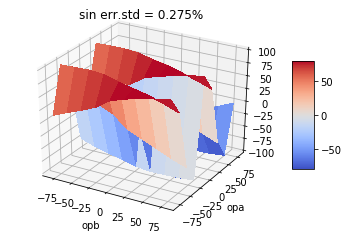

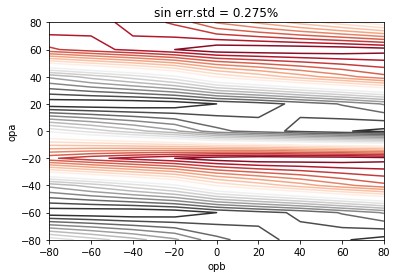

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

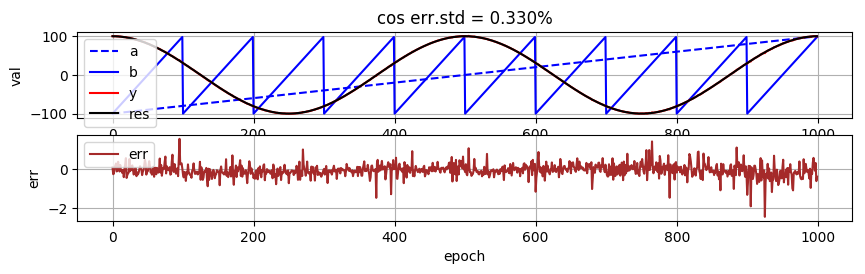

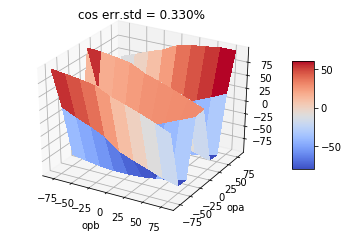

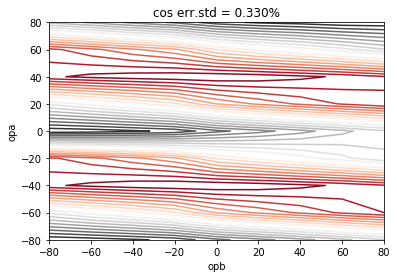

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

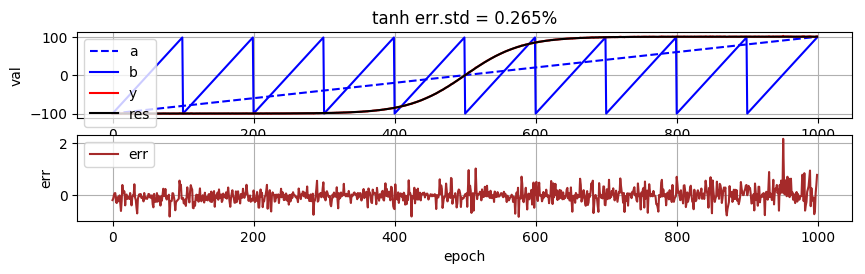

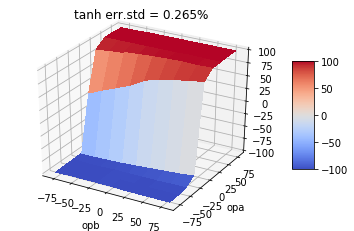

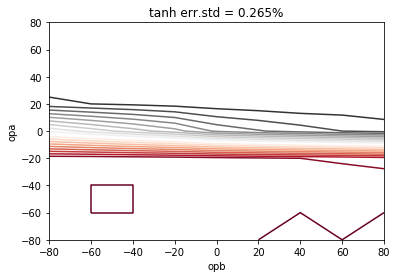

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

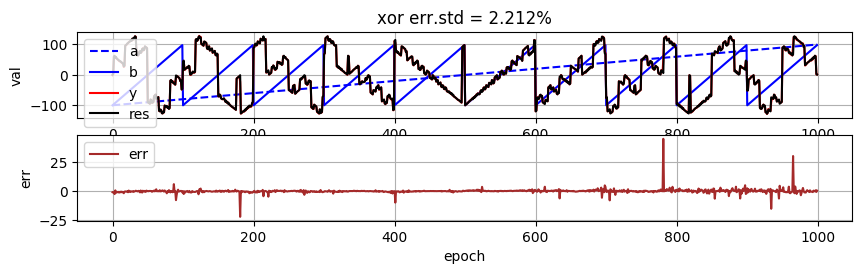

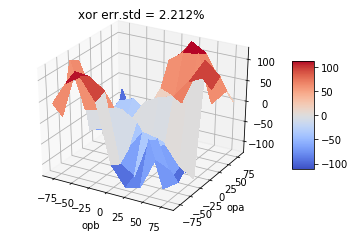

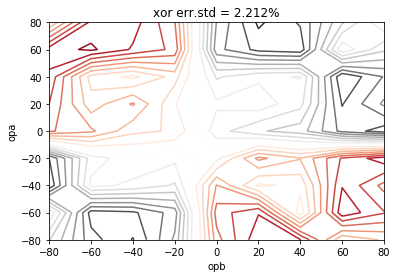

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

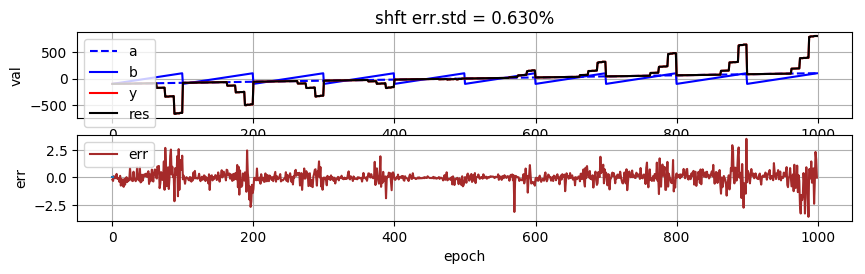

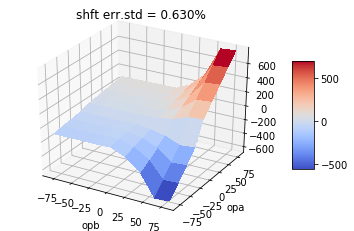

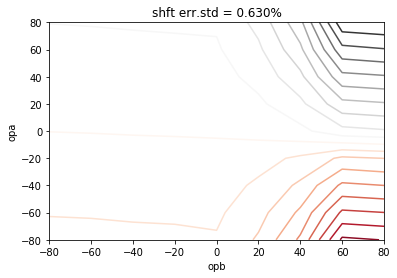

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

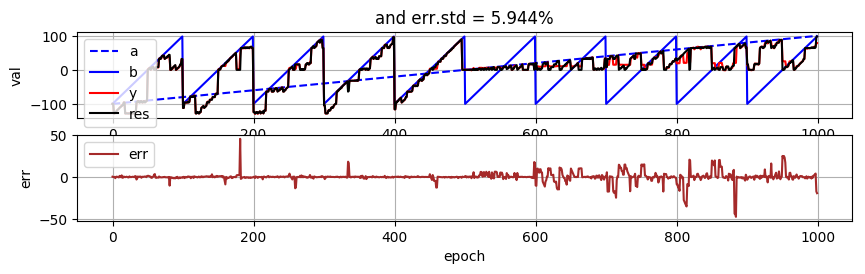

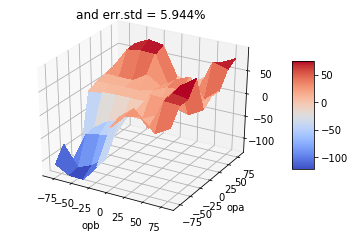

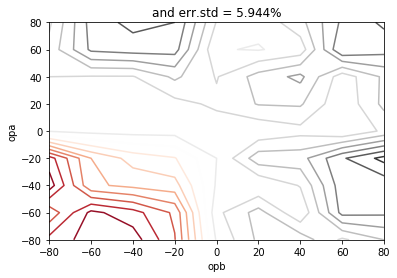

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

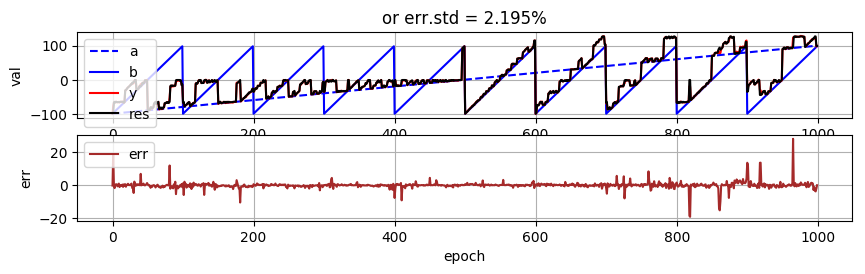

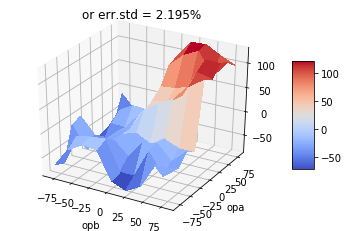

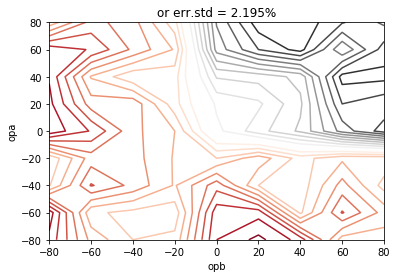

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

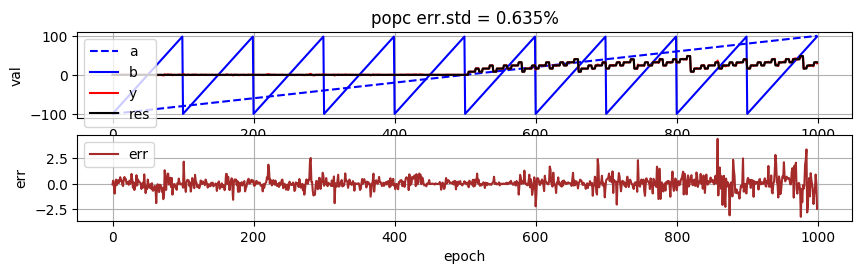

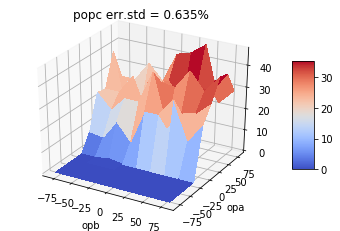

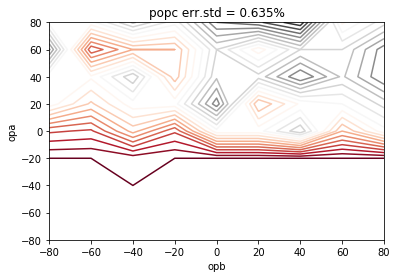

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

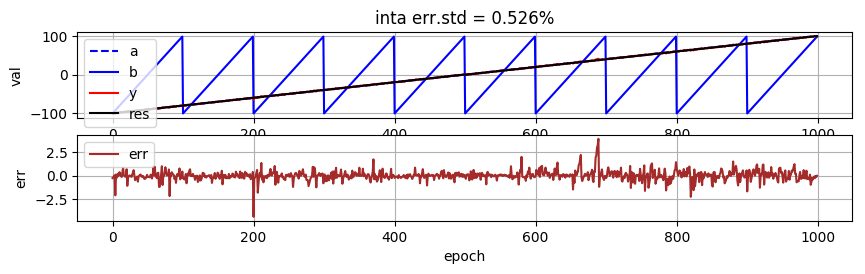

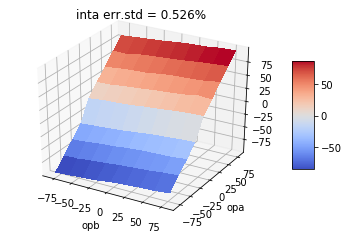

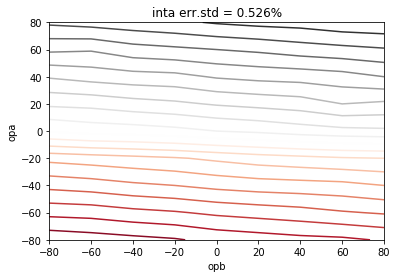

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

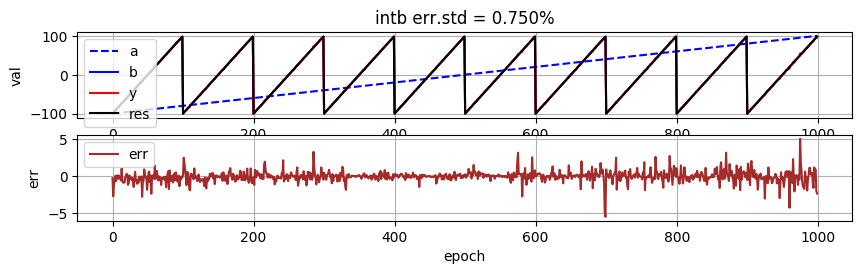

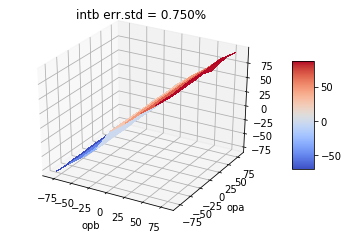

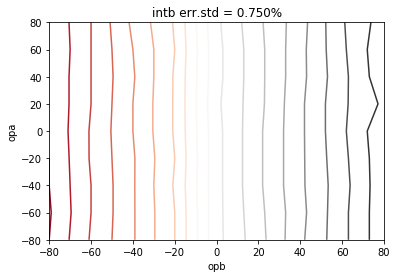

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

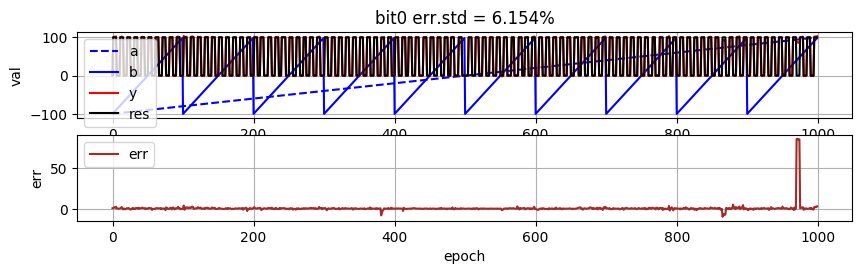

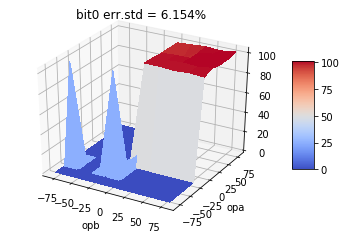

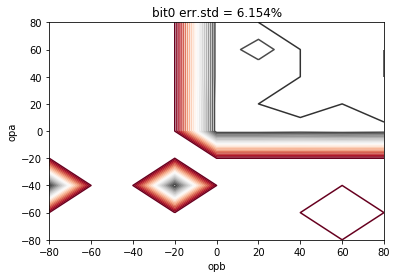

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

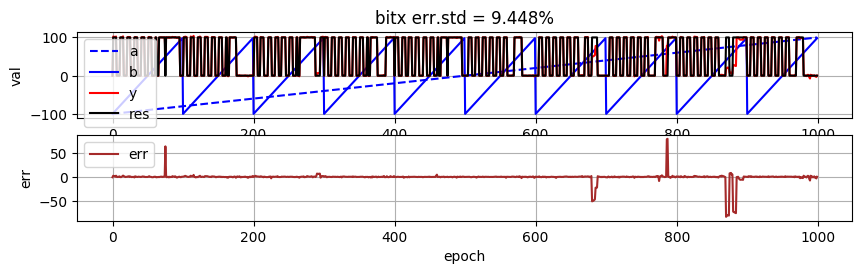

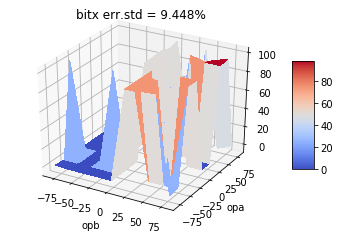

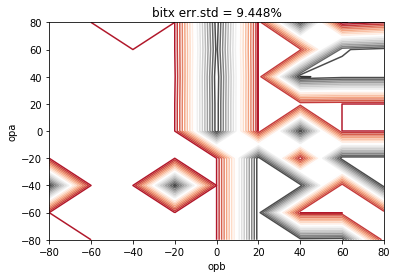

<IPython.core.display.Javascript object>

In [91]:


from matplotlib import pylab
from google.colab import widgets
tb = widgets.TabBar([str(opcodes[p]) for p in range(26)])

#for i in range(26):
#  # Only select the first 3 tabs, and render others in the background.
#  with tb.output_to(i, select=(i < 3)):
#    pylab.plot([1, i, 3])
#    pylab.show()


yo = alumodel.predict( [xx0,xx0], verbose=1)
err=yo-y

for p in range(0,26) :
 
  i=p*1000
  #print(i)
  std=np.std(err[i:i+1000])
  #print(std)
  
  dpi = 200
  xinch = 2000 / dpi
  yinch =  500 / dpi
  
  
  with tb.output_to(p,select=p<3) :

    # plot and save in the same size as the original
    fig = plt.figure(figsize=(xinch,yinch),dpi=100)
    
    plt.subplot(2, 1, 1)
  
    plt.plot(x [i:i+1000,0,0],label="a",color='blue',linestyle='--')
    plt.plot(x [i:i+1000,0,1],label="b",color='blue',linestyle='-')
    plt.plot(yo[i:i+1000],    label="res",color='red')
    plt.plot(y [i:i+1000],    label="y",color='black')
   
  
    title=op[i]+' err.std = '+str('%3.3f%%'% std)
    
    plt.title(title)
    plt.ylabel('val')
    
    plt.legend(['a', 'b', 'y', 'res', 'err'], loc='upper left')
    plt.grid(True)
    
    plt.subplot(2, 1, 2)
    plt.ylabel('err')
    plt.xlabel('epoch')
    plt.grid(True)
    
    plt.plot(err[i:i+1000], label="err",color='brown')
    plt.plot([0,0], label="zero")
    plt.legend(['err'], loc='upper left')

   #pylab.show()

  #

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    
    # Make data.
    XX = np.arange(-100, 100, 20)
    YY = np.arange(-100, 100, 20)
    XX, YY = np.meshgrid(XX, YY)
    ZZ = 0*(XX**2 + YY**2)
    #ZZ = np.sin(RR)
   
    z=np.zeros((10,10))
    #z=ZZ
    
    #print('YY=', YY.shape, YY[0:10,0])
    #print('ZZ=', ZZ.shape, ZZ[0:10,0])
    #print('z=', z.shape, z[0:10,0])
    
     
    for  ii in range(i,i+1000) :
      vara=int(xx[ii,0]/20)
      varb=int(xx[ii,1]/20)
      varo=int(yo[ii])
      #printf('ii=%d vara=%d, varb=%d, varo=%d\n', ii, vara, varb, varo)
      
      #z[vara+10, varb+10]=varo
      ZZ[vara+5, varb+5]=varo
    #print(z[0:10,0:10])
    # Plot the surface.
    surf = ax.plot_surface(XX[1:10,1:10], YY[1:10,1:10], ZZ[1:10,1:10], cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)
    plt.title(title)
    plt.ylabel('opa')
    plt.xlabel('opb')

    
    
    # Customize the z axis.
    #ax.set_zlim(-1.01, 1.01)
    #ax.zaxis.set_major_locator(LinearLocator(10))
    #ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    
    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    
    plt.show()  
    
    fig = plt.figure()
    #ontour = plt.contour(XX, YY, z, colors='black')
    #ontour = plt.contour(XX, YY, z, colors='RdGy')
    contour = plt.contour(XX[1:10,1:10], YY[1:10,1:10], ZZ[1:10,1:10], 20, cmap='RdGy');

    plt.title(title)
    plt.ylabel('opa')
    plt.xlabel('opb')




In [0]:
!pwd
!ls

/content/movies
/content
Creation of the directory path
/content/movies
ALU_op_abs.mp4	 ALU_op_div.mp4   ALU_op_mod.mp4   ALU_op_sign.mp4
ALU_op_add.mp4	 ALU_op_exp.mp4   ALU_op_mult.mp4  ALU_op_sin.mp4
ALU_op_and.mp4	 ALU_op_inta.mp4  ALU_op_or.mp4    ALU_op_sub.mp4
ALU_op_bit0.mp4  ALU_op_intb.mp4  ALU_op_popc.mp4  ALU_op_tanh.mp4
ALU_op_bitx.mp4  ALU_op_log.mp4   ALU_op_sela.mp4  ALU_op_xor.mp4
ALU_op_cos.mp4	 ALU_op_max.mp4   ALU_op_selb.mp4
ALU_op_cst0.mp4  ALU_op_min.mp4   ALU_op_shft.mp4
(1000, 26000)
(26000, 1)


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationW

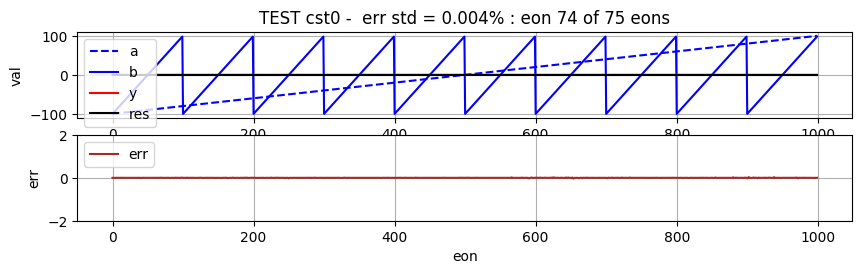

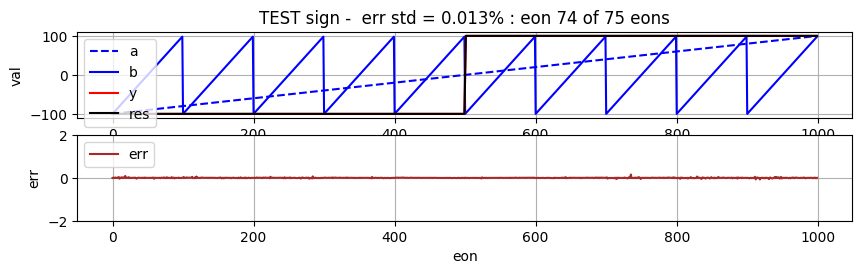

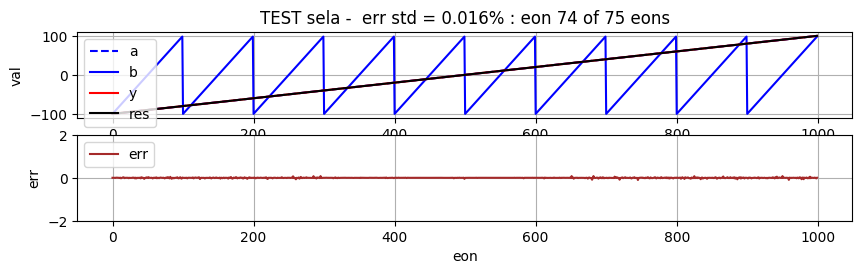

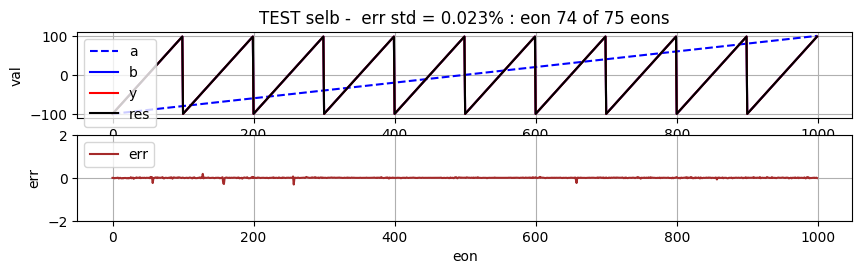

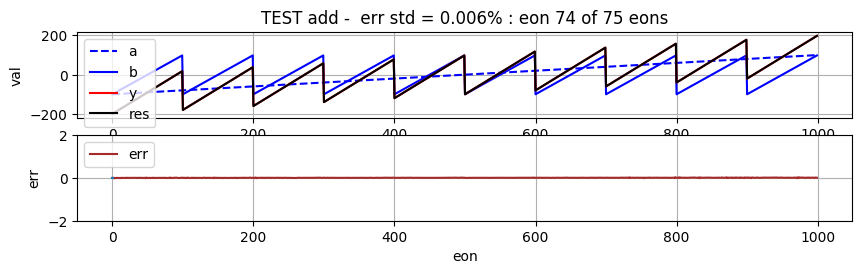

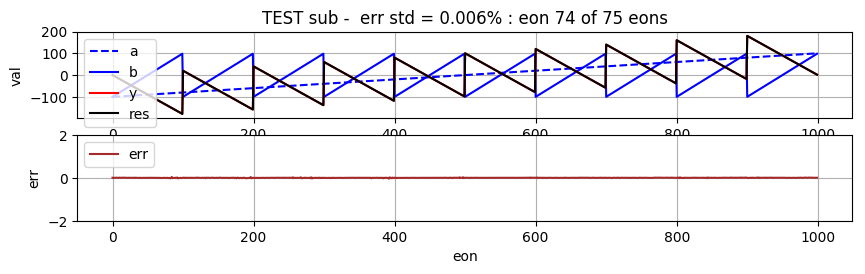

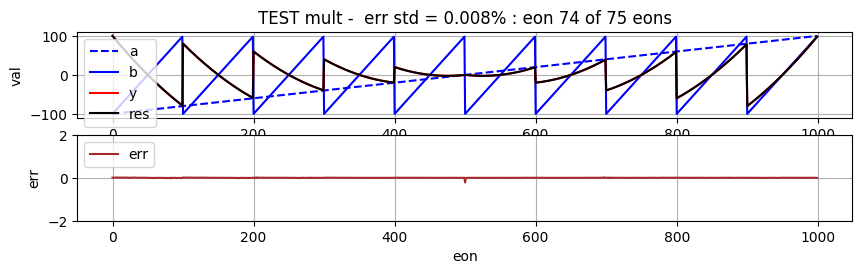

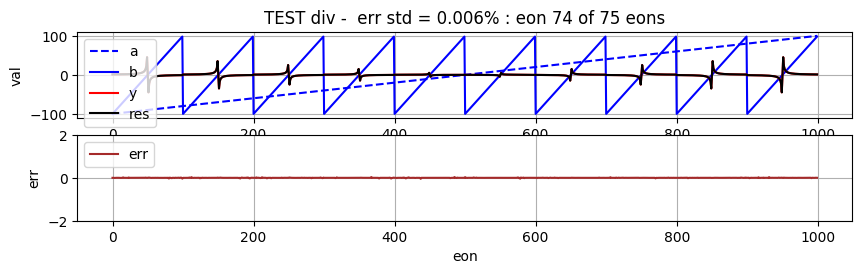

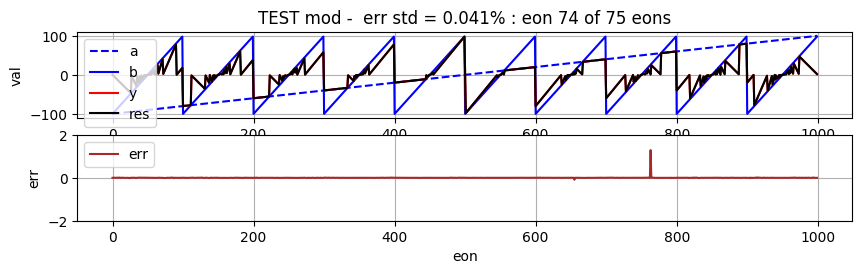

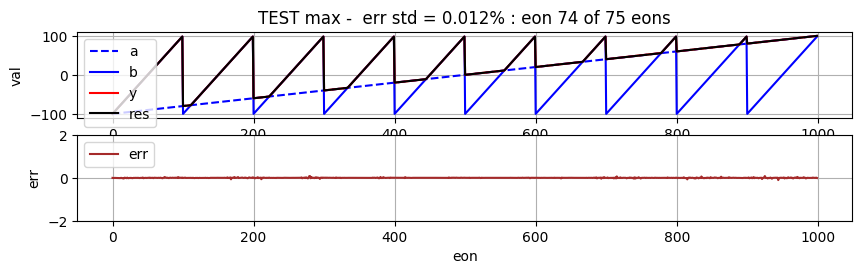

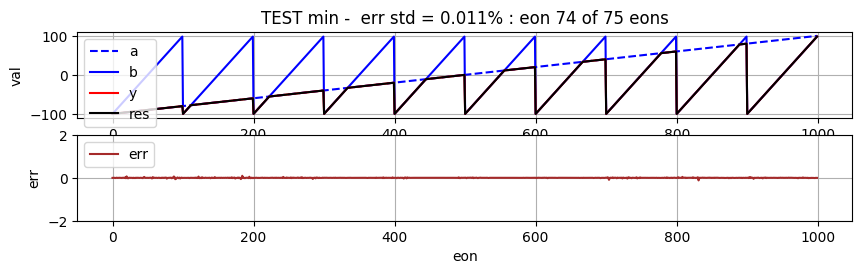

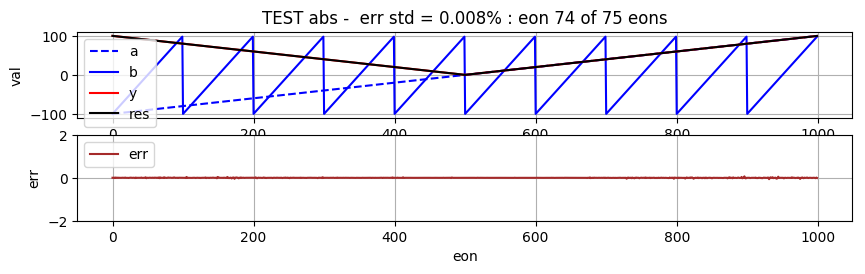

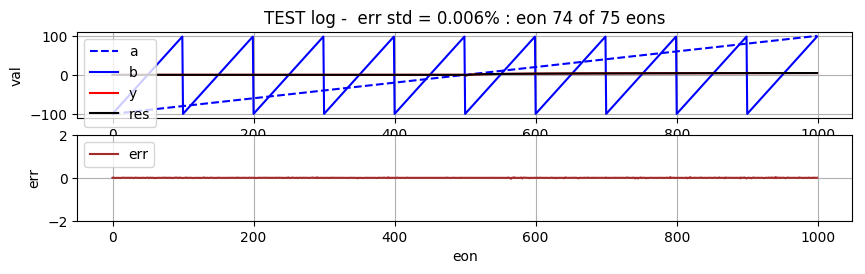

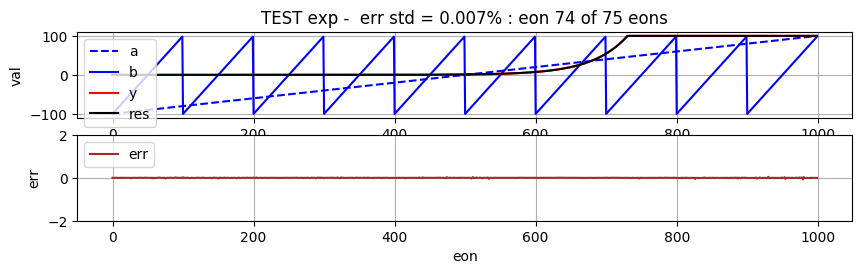

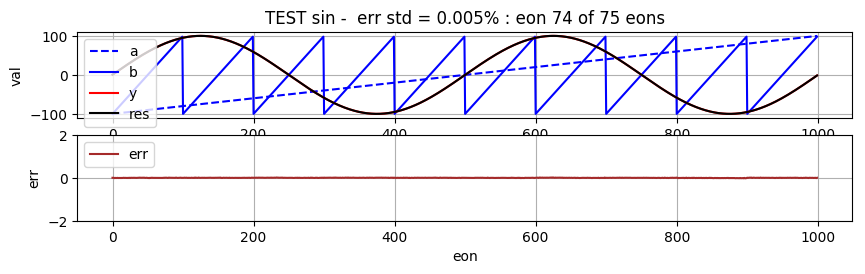

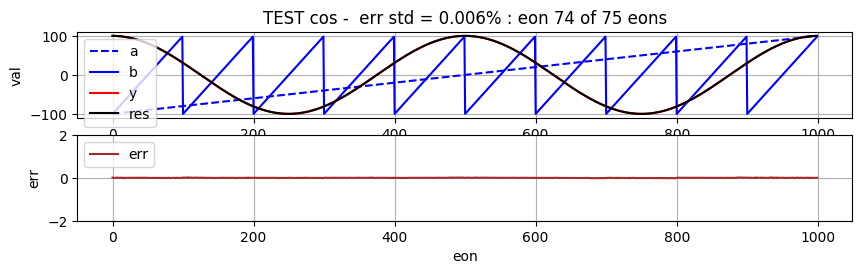

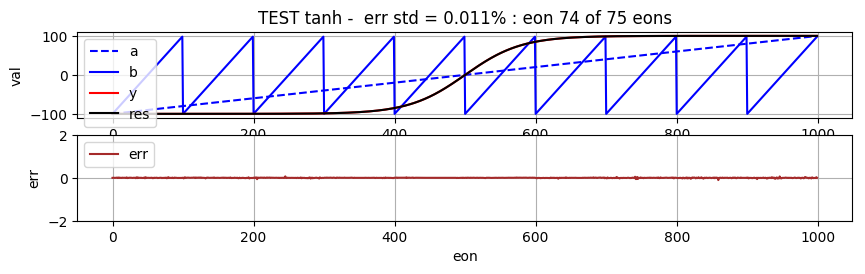

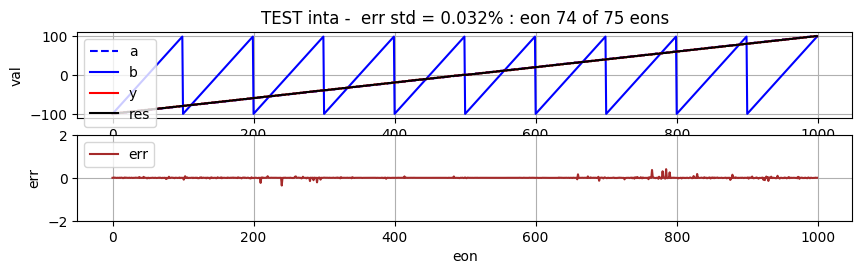

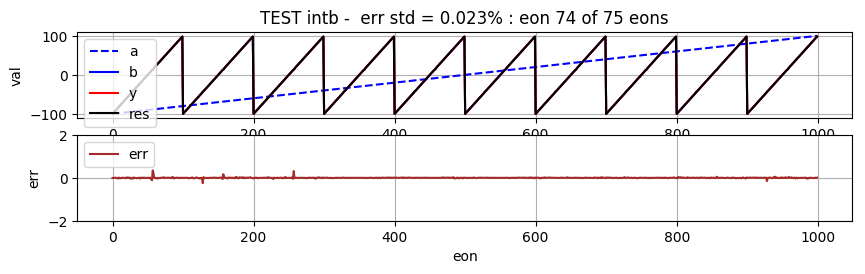

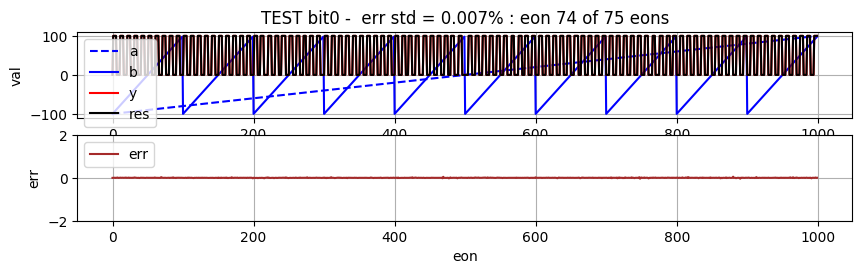

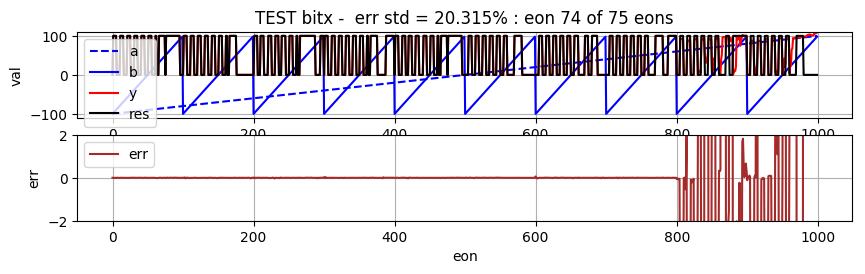

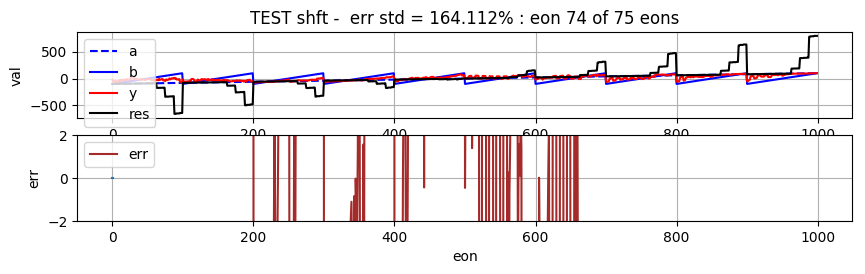

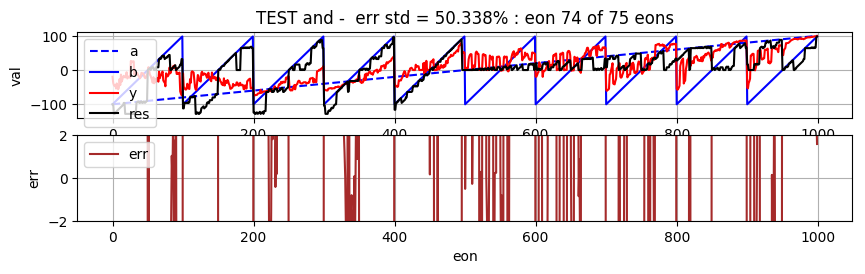

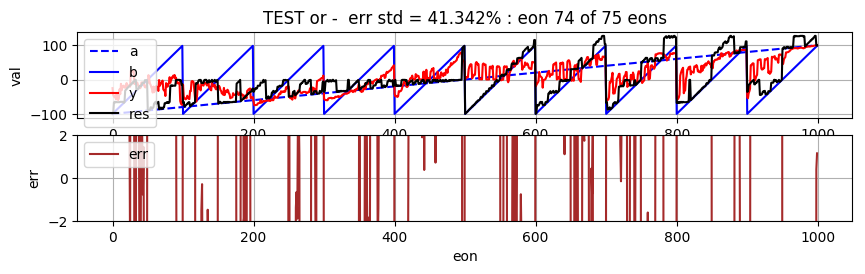

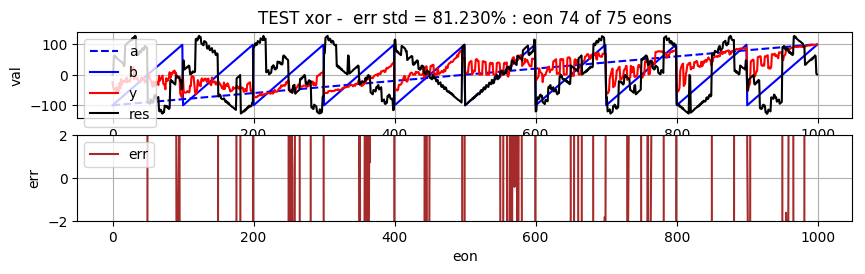

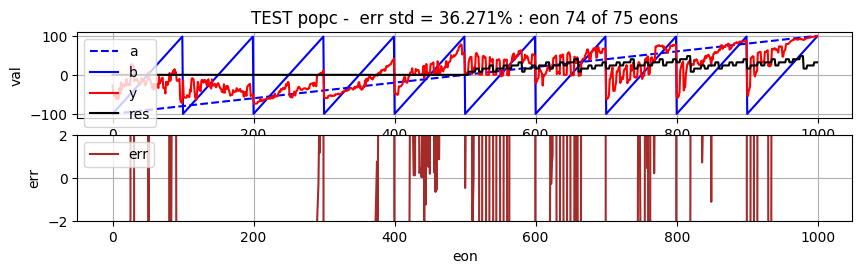

In [0]:
#make a movie 

import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.animation as manimation
from matplotlib.animation import FFMpegWriter
from matplotlib.animation import FFMpegFileWriter
from matplotlib.animation import ImageMagickWriter

import base64
from IPython.display import HTML


# Fixing random state for reproducibility
#np.random.seed(19680801)

#make the movie dir and delete any existing movies
import os

print(os.getcwd())
os.chdir('/content')
print(os.getcwd())
try:  
    os.mkdir("./movies")
except OSError:  
    print ("Creation of the directory %s"  % 'path')
else:  
    print ("Successfully created the directory %s " % 'path')
    
os.chdir('./movies')

print(os.getcwd())
!ls
!rm ./*.mp4

fps=eons/10
#fps=10

print(yhist.shape)

#FFMpegWriter = manimation.writers['ffmpeg']
#FFMpegWriter = manimation.writers['ImageMagickWriter']
#FFMpegWriter = manimation.writers['AVConvWriter']

metadata     = dict(title='Movie Test', artist='Matplotlib', comment='Movie support!')
writer       = FFMpegWriter(fps=fps, codec=None, bitrate=None, metadata=metadata)
#writer       = ImageMagickWriter(fps=1, codec=None, bitrate=None, metadata=metadata)

#ImageMagickWriter

dpi = 200.
xinch = 2000 / dpi
yinch =  500 / dpi

#fig = plt.figure(figsize=(xinch,yinch),dpi=100)



print(y.shape)
#tb = widgets.TabBar([str(opcodes[p]) for p in range(26)])

for p in range (26) :
  
#  with tb.output_to(p,select=p<3) :
  if(1) :

    vtitle='ALU_op_' +  opcodes[p] + '.mp4'
    fig = plt.figure(figsize=(xinch,yinch),dpi=100)
  
    with writer.saving(fig, vtitle, dpi=100):
      #wite 40 frames
      for f in range(eons):
        i=p*1000
        #print('make frame p=%d frame=%d',p,f)
        yo=yhist[f, :]
        err=yo[:] - y[:,0]
        std=np.std(err[i:i+1000])
        title='TEST ' + op[i]+' -  err std = ' + str('%3.3f%% : '% std)+'eon ' + str(f)+ ' of '  + str(eons) + ' eons'

        if f==0: 
          # plot 
          #fig = plt.figure(figsize=(xinch,yinch))
     
          plt.subplot(2, 1, 1)
    
          plt.plot(x  [ i:i+1000,0,0],label="a",color='blue',linestyle='--')
          plt.plot(x  [ i:i+1000,0,1],label="b",color='blue',linestyle='-')
          lo,=plt.plot(yo [ i:i+1000],    label="res",color='red')
          plt.plot(y  [ i:i+1000],    label="y",color='black')
          
             
          plt.title(title)
          plt.ylabel('val')
         
          plt.legend(['a', 'b', 'y', 'res', 'err'], loc='upper left')
          plt.grid(True)
      
          plt.subplot(2, 1, 2)
          plt.ylabel('err')
          plt.xlabel('eon')
          plt.grid(True)
          plt.ylim([-2,+2])
          
           
          le,=plt.plot(err[i:i+1000], label="err",color='brown')
          plt.plot([0,0], label="zero")
          plt.legend(['err'], loc='upper left')
     
        else :
          
          lo.set_data(range(1000),yo [ i:i+1000])
          le.set_data(range(1000),err[ i:i+1000])
          
          plt.subplot(2, 1, 1)
          plt.title(title)
          
        plt.show()
        writer.grab_frame()

    video = open('/content/movies/'+vtitle, 'r+b').read()
    
    encoded = base64.b64encode(video)
    HTML(data='''<video alt="test" controls>
                 <source src="data:video/mp4;base64,{0}" type="video/mp4" />
                 </video>'''.format(encoded.decode('ascii')))
    
  video = open('/content/movies/ALU_op_cst0.mp4', 'r+b').read()
  encoded = base64.b64encode(video)
  HTML(data='''<video alt="test" controls>
                  <source src="data:video/mp4;base64,{0}" type="video/mp4" />
               </video>'''.format(encoded.decode('ascii')))